In [1]:
## Ejercicio 1: Lectura de archivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import warnings

warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('bfi.csv')

In [3]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [4]:
#-------------------------------
## Ejercicio 2: Preprocesamiento

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

<Figure size 288x288 with 0 Axes>

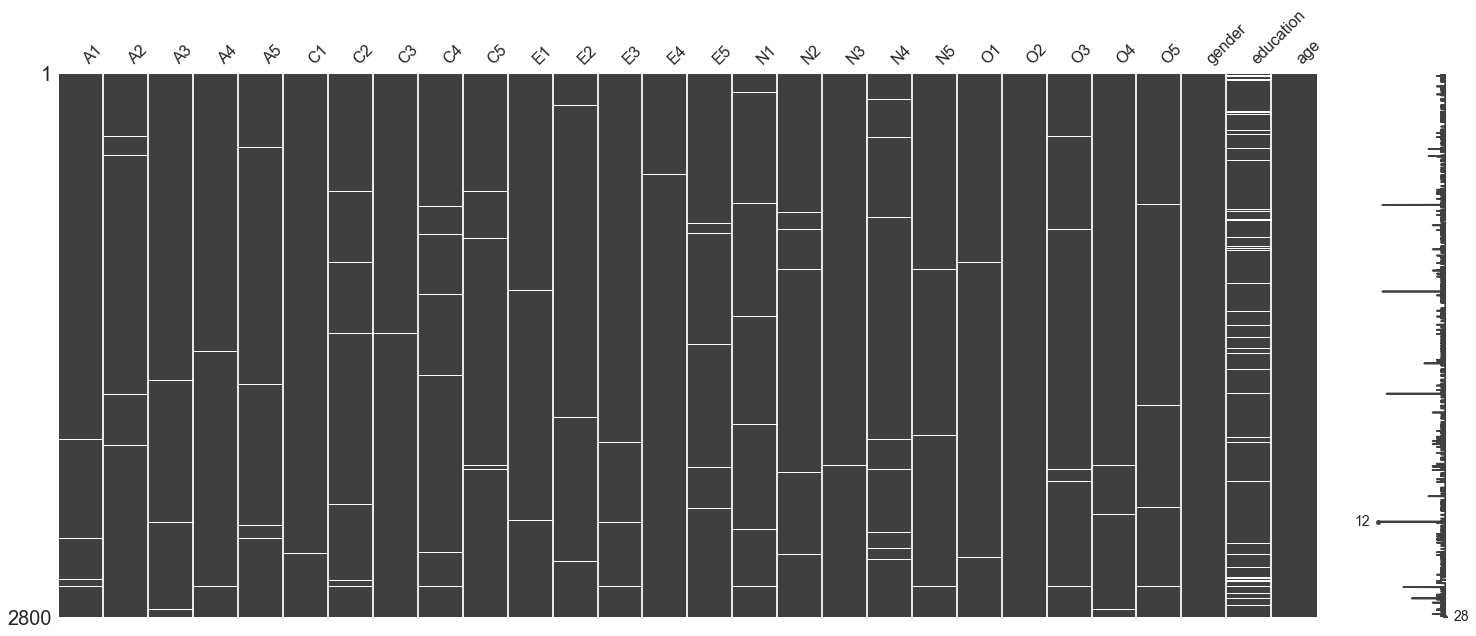

In [6]:
#Analice el patrón de datos perdidos con `missingno`
import factor_analyzer as factor
import missingno as msngo
plt.figure(figsize=(4,4))
msngo.matrix(df.replace([8,9], [np.nan, np.nan]))

In [7]:
#Se observa que las respuestas con mayores datos perdidos es Educación.

In [8]:
#Genere un nuevo objeto donde almacenará la base sin valores perdidos

In [9]:
df_sin_nulos = df.dropna()

In [10]:
#--------------------------------
### Ejercicio 3: Descripción
df_preguntas = df_sin_nulos.loc[:, 'A1': 'O5']

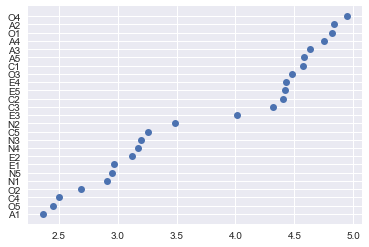

In [11]:
variable = []
mean = []
for name, serie in df_preguntas.iteritems():
    variable.append(name)
    mean.append(serie.mean())
df_plot = pd.DataFrame({'pregunta': variable, 'mean': mean}).sort_values(by=['mean'])
plt.plot(df_plot['mean'], df_plot['pregunta'], 'o')

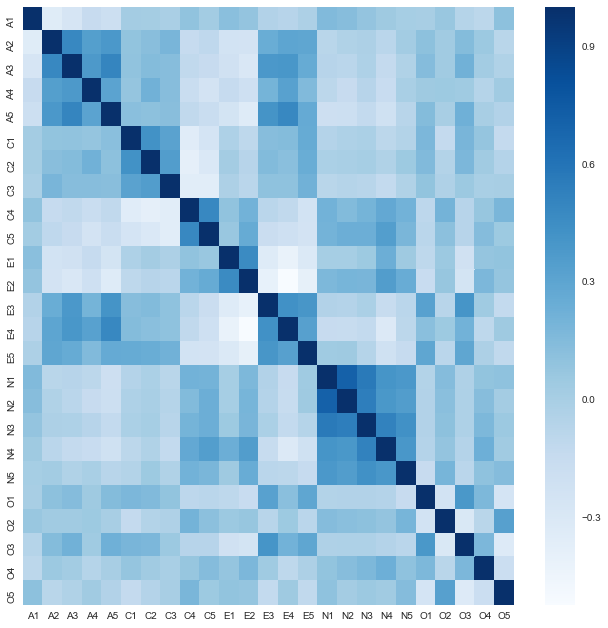

In [12]:
plt.figure(figsize=(11,11))
sns.heatmap(df_preguntas.corr(), cmap='Blues')

In [13]:
#Se puede apreciar que las preguntas con A están altamente correlacionados, zona más oscura. 
#Las preguntas con O no tienen mucha correlación.

In [14]:
### Ejercicio 4: Extracción de factores

In [15]:
#Si el p-value es menor a 0.05 rechazamos la hipotesis nula que es matriz identidadd
import factor_analyzer as fact
fact.calculate_bartlett_sphericity(df_preguntas)


(16484.78165416042, 0.0)

In [16]:
#p-value da cero, por lo tanto, se rechaza que la matriz de preguntas no es igual a una matrid ID

In [17]:
#Prueba Kaiser-Meter_Olkin, se debe superar valores superiores a 0.7, se puede seguir.
fact.calculate_kmo(df_preguntas)

(         KMO
 A1  0.738005
 A2  0.834387
 A3  0.871681
 A4  0.870525
 A5  0.900699
 C1  0.838225
 C2  0.788569
 C3  0.849578
 C4  0.823776
 C5  0.861994
 E1  0.841634
 E2  0.883987
 E3  0.893156
 E4  0.878282
 E5  0.894127
 N1  0.778281
 N2  0.778607
 N3  0.860167
 N4  0.886345
 N5  0.860604
 O1  0.855123
 O2  0.783962
 O3  0.833868
 O4  0.781271
 O5  0.758213, 0.8469455121781353)

In [30]:
#* Instancie un objeto con `FactorAnalyzer()` donde se estimen 10 dimensiones latentes y no se aplique rotación.
factorize = fact.FactorAnalyzer()
factorize.analyze(data=df_preguntas, n_factors=10,  method='varimax')

Text(0.5,1,'Scree plot')

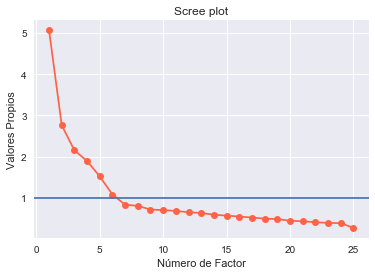

In [31]:
#* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
factor_screeplot = factorize.get_eigenvalues()[0]
plt.plot(factor_screeplot.index +1, factor_screeplot.values, 'o-', color= 'tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1) #criterio de corte
plt.title("Scree plot")

In [20]:
#se deben preservar todos los factores con eigenvalues mayores a 1

In [49]:
factorize_02 = fact.FactorAnalyzer()

In [50]:
factorize_02.analyze(data=df_preguntas, n_factors=5,  method='varimax')

In [51]:
factor_loadings = factorize_02.loadings
factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.116593,0.149412,0.068191,-0.075617,-0.451705
A2,0.130895,0.049023,0.072670,-0.011234,0.587349
A3,0.243638,0.036805,0.021319,-0.014470,0.603462
A4,0.112788,-0.026504,0.186193,-0.185005,0.408451
A5,0.323873,-0.085975,-0.024192,0.004120,0.484016
C1,-0.038014,0.078560,0.564973,0.161000,-0.025636
C2,-0.107284,0.155952,0.690145,0.044214,0.058758
C3,-0.088519,0.025665,0.598839,-0.056700,0.065734
C4,0.062198,0.175909,-0.644196,-0.054569,0.032090
C5,-0.069523,0.202749,-0.557100,0.086478,0.031139


In [52]:
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,,,,,
A2,,,,,0.59
A3,,,,,0.6
A4,,,,,0.41
A5,,,,,0.48
C1,,,0.56,,
C2,,,0.69,,
C3,,,0.6,,
C4,,,,,
C5,,,,,


In [54]:
#Factor 1 presenta información relacionada con la comunicación del individuo
#Factor 2 predomina información con la irritabilidad del individuo.
#Factor 3 destaca información sobre los hábitos
#Factor 4 levemente destaca sobre información de motivación de aprendizaje del individuo
#Factor 5 habla sobre la empatía con la sociedad.

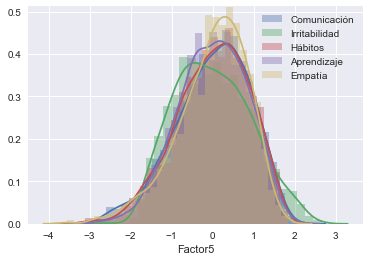

In [57]:
#Puntaje
extract_factor_scores = factorize_02.get_scores(df_preguntas)
sns.distplot(extract_factor_scores.loc[:, 'Factor1'], label="Comunicación")
sns.distplot(extract_factor_scores.loc[:, 'Factor2'], label="Irritabilidad")
sns.distplot(extract_factor_scores.loc[:, 'Factor3'], label="Hábitos")
sns.distplot(extract_factor_scores.loc[:, 'Factor4'], label="Aprendizaje")
sns.distplot(extract_factor_scores.loc[:, 'Factor5'], label="Empatía")
plt.legend()

In [56]:
factorize_02.get_scores(df_preguntas).head()

,Factor1,Factor2,Factor3,Factor4,Factor5
0,1.243678,0.026460,1.424903,0.399940,0.150827
1,-1.825678,0.578436,-1.283249,-0.574451,-2.160638
2,0.199390,-0.166390,-0.180774,-0.347959,-0.103883
3,-0.093278,-0.493823,0.544909,-0.285536,-1.640317
4,0.190778,-0.869320,-1.337657,0.304891,0.637236
